# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import api_keys
from datetime import date
from pprint import pprint
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

count_one = 0
set_one = 1

In [23]:
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?q='



## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [26]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(url + city + '&units=imperial&appid=' + api_key).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
        
print('------------------------------')
print('End of Records')
print('------------------------------')

Processing Record 1 of Set 1 | kavieng
Processing Record 2 of Set 1 | bonavista
Processing Record 3 of Set 1 | san pedro
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | khatanga
City not found. Skipping...
Processing Record 9 of Set 1 | libertador general san martin
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | kjollefjord
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | ewa beach
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | amboasary
Processing Record 18 of Set 1 | gat
Processing Record 19 of Set 1 | tasiilaq
City not found. Skipping...
Processing Record 20 of Set 1 | faanui
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | oktyabrskiy
Processing Record 23 o

Processing Record 38 of Set 4 | christiana
Processing Record 39 of Set 4 | cap malheureux
Processing Record 40 of Set 4 | noumea
City not found. Skipping...
Processing Record 41 of Set 4 | souillac
Processing Record 42 of Set 4 | vestmannaeyjar
Processing Record 43 of Set 4 | san quintin
Processing Record 44 of Set 4 | nongstoin
Processing Record 45 of Set 4 | isangel
Processing Record 46 of Set 4 | yanam
City not found. Skipping...
Processing Record 47 of Set 4 | ust-kuyga
Processing Record 48 of Set 4 | anadyr
Processing Record 49 of Set 4 | sioux lookout
Processing Record 1 of Set 5 | vilhena
Processing Record 2 of Set 5 | sinjai
Processing Record 3 of Set 5 | ocos
Processing Record 4 of Set 5 | bambous virieux
Processing Record 5 of Set 5 | quzhou
Processing Record 6 of Set 5 | jacareacanga
Processing Record 7 of Set 5 | xinyang
Processing Record 8 of Set 5 | torbay
Processing Record 9 of Set 5 | sangar
Processing Record 10 of Set 5 | touros
Processing Record 11 of Set 5 | meulaboh

Processing Record 26 of Set 8 | narsaq
Processing Record 27 of Set 8 | makakilo city
Processing Record 28 of Set 8 | kenai
Processing Record 29 of Set 8 | batticaloa
Processing Record 30 of Set 8 | tyazhinskiy
Processing Record 31 of Set 8 | strezhevoy
Processing Record 32 of Set 8 | laja
Processing Record 33 of Set 8 | saint anthony
Processing Record 34 of Set 8 | carballo
Processing Record 35 of Set 8 | bada
Processing Record 36 of Set 8 | rawson
Processing Record 37 of Set 8 | kaeo
City not found. Skipping...
City not found. Skipping...
Processing Record 38 of Set 8 | gualaquiza
Processing Record 39 of Set 8 | timmins
City not found. Skipping...
Processing Record 40 of Set 8 | khor
Processing Record 41 of Set 8 | mahina
Processing Record 42 of Set 8 | beruwala
Processing Record 43 of Set 8 | abu samrah
Processing Record 44 of Set 8 | khasan
Processing Record 45 of Set 8 | grootfontein
Processing Record 46 of Set 8 | nuuk
Processing Record 47 of Set 8 | bandarbeyla
Processing Record 

City not found. Skipping...
Processing Record 11 of Set 12 | illela
Processing Record 12 of Set 12 | vicksburg
------------------------------
End of Records
------------------------------


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
#Create a dataframe with required items
city_data_df = pd.DataFrame( {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
})

#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')


city_data_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kavieng,50,PG,1562826777,74,-2.57,150.80,83.21,13.22
1,bonavista,46,CA,1562827368,83,48.65,-53.11,46.99,3.00
2,san pedro,100,AR,1562827369,90,-33.68,-59.66,46.99,1.99
3,tuktoyaktuk,90,CA,1562826852,93,69.44,-133.03,41.00,13.87
4,rikitea,13,PF,1562827369,81,-23.12,-134.97,73.49,17.72


In [34]:
city_data_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

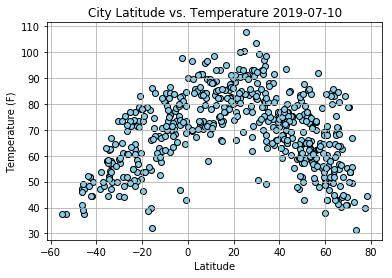

In [44]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],edgecolors="black",facecolors="skyblue")
plt.title(f'City Latitude vs. Temperature {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')

#### Latitude vs. Humidity Plot

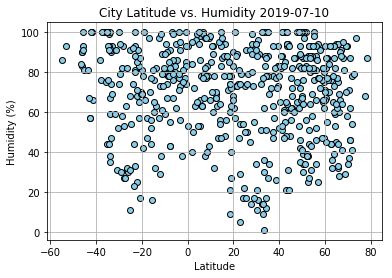

In [43]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],edgecolors="black",facecolors="skyblue")
plt.title(f'City Latitude vs. Humidity {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_humid.png', bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

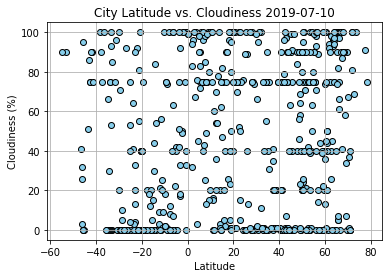

In [42]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],edgecolors="black",facecolors="skyblue")
plt.title(f'City Latitude vs. Cloudiness {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_cloud.png', bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

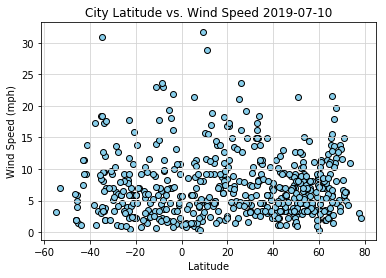

In [41]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],edgecolors="black",facecolors="skyblue")
plt.title(f'City Latitude vs. Wind Speed {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig('lat_wind.png', bbox_inches='tight')

In [ ]:
This shows that temp goes up the closer you go to the equator.
wind speed and clouds are the same no matter what lattitude.